# AI GENERATED IMAGE DETECTION (CNN)

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
from torch import optim
from tqdm import tqdm
import torch.nn.functional as F
import torchvision.transforms
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
# Loading train dataset

In [3]:
loc = '/Users/suyashk11/Desktop/VLG_Project/train.csv'

In [4]:
train = pd.read_csv(loc)
train

,labels,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,0,-2.033875,0.978446,-0.142131,-0.177117,-1.470684,1.669562,-0.196530,-0.125239,-0.452284,...,-1.111266,0.716084,0.060039,0.301279,-1.174846,-1.076498,-0.069452,-0.604012,-2.179176,0.558003
1,1,-0.348835,0.294815,-0.557577,-2.020773,-1.234715,1.633930,-1.680658,-0.358146,0.166122,...,0.735240,0.829781,1.521941,1.347946,0.754505,1.330642,-0.754453,0.582956,0.252671,1.495870
2,1,0.113248,-0.607726,-0.947791,0.830851,0.998291,0.498321,-1.493958,0.789572,-1.311018,...,0.104698,0.616189,-1.035953,2.111387,-0.984415,1.148076,-1.433554,0.243372,0.170083,1.274795
3,0,1.223321,-0.479048,-1.925789,1.680377,0.021840,-1.453307,0.605559,-0.019024,1.065448,...,0.360237,-1.957863,-0.123384,1.505329,0.660290,-1.769443,-0.547756,-0.568122,0.244645,0.982116
4,0,0.160109,0.422684,-0.308029,0.227744,0.432854,0.608348,0.193832,1.035091,-0.538868,...,0.416629,1.441766,0.212572,-0.994721,1.143999,-2.166923,-1.199248,-1.028636,0.752791,0.317169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,0,1.157565,-0.142219,1.043992,1.144946,1.195423,0.248978,-1.505100,-0.874137,-1.782724,...,1.195423,-0.255793,-0.154838,0.413029,-0.482939,-1.277953,-0.445082,1.195423,-0.924614,-0.432462
5246,0,1.424709,0.235910,1.356778,1.368099,-0.318862,1.039765,-0.986854,-0.330184,-1.383120,...,1.424709,-1.066107,0.881258,-0.488691,-1.281223,-1.213291,0.122692,1.175627,-1.145360,0.451026
5247,1,-0.375687,1.524455,0.012514,-0.007917,0.073809,-0.906909,-1.254247,1.606182,0.298557,...,-0.028349,-0.968204,-1.233815,1.626613,-0.191802,1.115823,0.380284,-0.293960,0.135104,1.381434
5248,1,-0.478238,1.666142,0.049609,-0.428752,-0.362771,1.798104,-0.214314,0.775400,-0.379267,...,-0.428752,-1.121552,-0.379267,-0.593705,0.049609,1.765114,0.313533,-0.329781,-1.220524,0.033114


In [5]:
x = train.iloc[:,1:]
x

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,-2.033875,0.978446,-0.142131,-0.177117,-1.470684,1.669562,-0.196530,-0.125239,-0.452284,-0.128052,...,-1.111266,0.716084,0.060039,0.301279,-1.174846,-1.076498,-0.069452,-0.604012,-2.179176,0.558003
1,-0.348835,0.294815,-0.557577,-2.020773,-1.234715,1.633930,-1.680658,-0.358146,0.166122,-1.656990,...,0.735240,0.829781,1.521941,1.347946,0.754505,1.330642,-0.754453,0.582956,0.252671,1.495870
2,0.113248,-0.607726,-0.947791,0.830851,0.998291,0.498321,-1.493958,0.789572,-1.311018,0.848524,...,0.104698,0.616189,-1.035953,2.111387,-0.984415,1.148076,-1.433554,0.243372,0.170083,1.274795
3,1.223321,-0.479048,-1.925789,1.680377,0.021840,-1.453307,0.605559,-0.019024,1.065448,0.717341,...,0.360237,-1.957863,-0.123384,1.505329,0.660290,-1.769443,-0.547756,-0.568122,0.244645,0.982116
4,0.160109,0.422684,-0.308029,0.227744,0.432854,0.608348,0.193832,1.035091,-0.538868,0.778445,...,0.416629,1.441766,0.212572,-0.994721,1.143999,-2.166923,-1.199248,-1.028636,0.752791,0.317169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,1.157565,-0.142219,1.043992,1.144946,1.195423,0.248978,-1.505100,-0.874137,-1.782724,0.261597,...,1.195423,-0.255793,-0.154838,0.413029,-0.482939,-1.277953,-0.445082,1.195423,-0.924614,-0.432462
5246,1.424709,0.235910,1.356778,1.368099,-0.318862,1.039765,-0.986854,-0.330184,-1.383120,1.243559,...,1.424709,-1.066107,0.881258,-0.488691,-1.281223,-1.213291,0.122692,1.175627,-1.145360,0.451026
5247,-0.375687,1.524455,0.012514,-0.007917,0.073809,-0.906909,-1.254247,1.606182,0.298557,0.053378,...,-0.028349,-0.968204,-1.233815,1.626613,-0.191802,1.115823,0.380284,-0.293960,0.135104,1.381434
5248,-0.478238,1.666142,0.049609,-0.428752,-0.362771,1.798104,-0.214314,0.775400,-0.379267,0.725914,...,-0.428752,-1.121552,-0.379267,-0.593705,0.049609,1.765114,0.313533,-0.329781,-1.220524,0.033114


In [6]:
np.max(x)

5.347407283650381

In [7]:
np.min(x)

-5.176033775043042

In [8]:
y = train.iloc[:,0]
y

0       0
1       1
2       1
3       0
4       0
       ..
5245    0
5246    0
5247    1
5248    1
5249    1
Name: labels, Length: 5250, dtype: int64

In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Columns: 1200 entries, f_0 to f_1199
dtypes: float64(1200)
memory usage: 48.1 MB


In [10]:
y.unique()

array([0, 1])

In [11]:
# There are therefore only 2 classes: 0 and 1

In [12]:
inp = torch.from_numpy(x.values.reshape(len(x),3,20,20).astype(float))

# Samples of Images

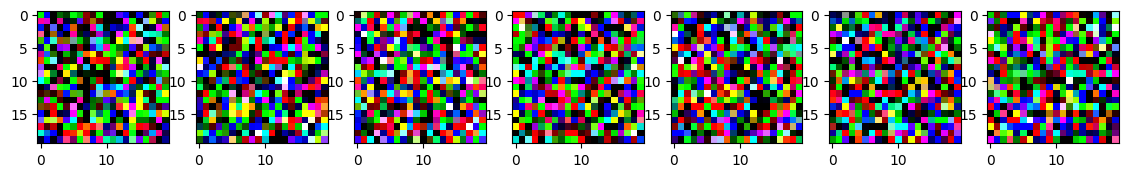

In [13]:
plt.figure(figsize=(16,16))
for i in range(7):
    plt.subplot(1,8,i+1)
    plt.imshow(torch.clamp(torch.from_numpy(x.iloc[i,:].values.reshape(20,20,3).astype(float)),0,1))

# Building a CNN using torch

In [14]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,3) #output 18*18*6
        self.pool= nn.MaxPool2d(2,2) #output 9*9*6
        self.conv2 = nn.Conv2d(6,12,3 , padding=1) #output 9*9*12
        self.hl1 = nn.Linear(81*12,243)
        self.hl2 = nn.Linear(243,122)
        self.hl3 = nn.Linear(122,61)
        self.hl4 = nn.Linear(61,2)
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.conv2(x)
        x = torch.flatten(x,1)
        x = self.hl1(x)
        x = self.hl2(x)
        x = self.hl3(x)
        x = F.sigmoid(self.hl4(x))
        return x

In [15]:
net = Net()
lossfn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.00007)
num_epochs = 30

In [16]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (hl1): Linear(in_features=972, out_features=243, bias=True)
  (hl2): Linear(in_features=243, out_features=122, bias=True)
  (hl3): Linear(in_features=122, out_features=61, bias=True)
  (hl4): Linear(in_features=61, out_features=2, bias=True)
)

In [17]:
batch_size = 64
loss_data = []
def training(num_epochs,inp):
    for epoch in range(num_epochs):
        running_loss = 0.0
        epoch_bar = tqdm(range(int(len(train) / batch_size)), desc=f'epoch {epoch + 1}')
        for i in epoch_bar:
            inputs = inp[i:i+batch_size].float()
            labels = torch.from_numpy(y.values[i:i+batch_size]).long()
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = lossfn(outputs.float(), labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            average_loss = running_loss / (i + 1)
        loss_data.append(average_loss)
        print(f"average_loss: {average_loss}")

training(num_epochs,inp)


epoch 1: 100%|█████████████████████████████████| 82/82 [00:00<00:00, 135.31it/s]


average_loss: 0.6206555918949407


epoch 2: 100%|█████████████████████████████████| 82/82 [00:00<00:00, 141.15it/s]


average_loss: 0.5902506927164589


epoch 3: 100%|█████████████████████████████████| 82/82 [00:00<00:00, 138.40it/s]


average_loss: 0.41706524098791725


epoch 4: 100%|█████████████████████████████████| 82/82 [00:00<00:00, 145.62it/s]


average_loss: 0.3403911448833419


epoch 5: 100%|█████████████████████████████████| 82/82 [00:00<00:00, 143.74it/s]


average_loss: 0.32493629833547083


epoch 6: 100%|█████████████████████████████████| 82/82 [00:00<00:00, 132.05it/s]


average_loss: 0.3195360048515041


epoch 7: 100%|█████████████████████████████████| 82/82 [00:00<00:00, 129.96it/s]


average_loss: 0.31860854458518145


epoch 8: 100%|█████████████████████████████████| 82/82 [00:00<00:00, 132.61it/s]


average_loss: 0.3181012156533032


epoch 9: 100%|█████████████████████████████████| 82/82 [00:00<00:00, 130.07it/s]


average_loss: 0.3178718700641539


epoch 10: 100%|████████████████████████████████| 82/82 [00:00<00:00, 136.37it/s]


average_loss: 0.3177468355109052


epoch 11: 100%|████████████████████████████████| 82/82 [00:00<00:00, 128.50it/s]


average_loss: 0.31766718008169315


epoch 12: 100%|████████████████████████████████| 82/82 [00:00<00:00, 134.54it/s]


average_loss: 0.31761747053483635


epoch 13: 100%|████████████████████████████████| 82/82 [00:00<00:00, 137.48it/s]


average_loss: 0.31758460838620256


epoch 14: 100%|████████████████████████████████| 82/82 [00:00<00:00, 131.68it/s]


average_loss: 0.31756125535906815


epoch 15: 100%|████████████████████████████████| 82/82 [00:00<00:00, 131.12it/s]


average_loss: 0.31754379701323626


epoch 16: 100%|████████████████████████████████| 82/82 [00:00<00:00, 137.43it/s]


average_loss: 0.31753030710104035


epoch 17: 100%|████████████████████████████████| 82/82 [00:00<00:00, 141.18it/s]


average_loss: 0.3175196211512496


epoch 18: 100%|████████████████████████████████| 82/82 [00:00<00:00, 136.74it/s]


average_loss: 0.31751098829071694


epoch 19: 100%|████████████████████████████████| 82/82 [00:00<00:00, 129.69it/s]


average_loss: 0.3175039036971767


epoch 20: 100%|████████████████████████████████| 82/82 [00:00<00:00, 134.48it/s]


average_loss: 0.3174980199191628


epoch 21: 100%|████████████████████████████████| 82/82 [00:00<00:00, 138.41it/s]


average_loss: 0.31749307164331764


epoch 22: 100%|████████████████████████████████| 82/82 [00:00<00:00, 139.93it/s]


average_loss: 0.3174888706061898


epoch 23: 100%|████████████████████████████████| 82/82 [00:00<00:00, 142.71it/s]


average_loss: 0.31748527651879843


epoch 24: 100%|████████████████████████████████| 82/82 [00:00<00:00, 142.07it/s]


average_loss: 0.3174821676277533


epoch 25: 100%|████████████████████████████████| 82/82 [00:00<00:00, 141.45it/s]


average_loss: 0.31747946542937583


epoch 26: 100%|████████████████████████████████| 82/82 [00:00<00:00, 140.20it/s]


average_loss: 0.317477104140491


epoch 27: 100%|████████████████████████████████| 82/82 [00:00<00:00, 127.55it/s]


average_loss: 0.3174750227026823


epoch 28: 100%|████████████████████████████████| 82/82 [00:00<00:00, 136.11it/s]


average_loss: 0.3174731902232984


epoch 29: 100%|████████████████████████████████| 82/82 [00:00<00:00, 135.95it/s]


average_loss: 0.31747155218589596


epoch 30: 100%|████████████████████████████████| 82/82 [00:00<00:00, 134.39it/s]

average_loss: 0.3174700922355419


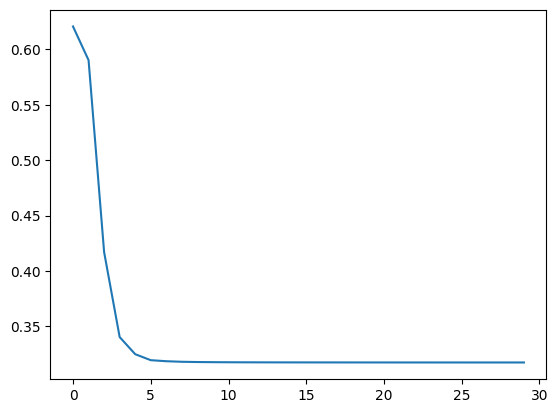

In [18]:
plt.plot(np.arange(num_epochs),loss_data)

In [19]:
torch.save(net.state_dict() , 'model.pt')

In [20]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [21]:
inp_test = torch.from_numpy(x_test.values.reshape(len(x_test),3,20,20).astype(float)).float()

# Checking Accuracy on Validation dataset

In [22]:
y_pred = torch.argmax(net(torch.from_numpy(x_test.values.reshape(len(x_test),3,20,20)).float()),axis=1)

In [23]:
print('accuracy score : ' , accuracy_score(y_pred,y_test))
print('f1 score : ', f1_score(y_pred,y_test))

accuracy score :  0.7409523809523809
f1 score :  0.2765957446808511


# Loading test dataset

In [24]:
testloc = '/Users/suyashk11/Desktop/VLG_Project/test.csv'
test = pd.read_csv(testloc)
test

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,1,-3.388242,0.868285,-0.427619,-0.678964,-1.625735,0.262761,1.243040,1.537751,-0.352028,...,-0.776403,-0.662884,-0.257091,-1.168413,0.223260,-0.482520,-0.085453,-0.382265,-0.539349,-1.682404
1,2,-0.496920,0.952381,0.989040,0.451422,0.513516,-0.099658,-1.124326,0.729430,-0.216224,...,0.379635,-1.760084,1.125450,-0.328047,-0.880305,-1.257607,0.964312,2.021104,0.655021,-0.423029
2,3,1.128369,-0.537951,2.544358,1.165254,-1.904994,0.776961,-0.495768,0.060111,-1.418468,...,1.165254,-1.373589,-0.483701,-0.964782,-0.869555,0.066040,-0.444567,-0.531935,-0.878660,1.099488
3,4,0.051253,1.746814,0.681177,1.844524,-0.327977,1.226839,-0.085519,0.379008,-1.003667,...,-0.442288,-2.794472,-0.763468,-0.789832,-0.113209,-2.703150,-2.058728,1.070627,-0.458045,-0.435825
4,5,1.423209,-0.983594,-1.694170,1.197507,1.044211,0.518777,-0.298612,-0.365174,0.738447,...,-2.624450,-3.200223,0.711422,-0.190394,0.337224,-1.656639,0.707360,-0.562290,1.471181,-0.192000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,2246,0.889888,-0.319077,0.849589,0.822723,0.876455,0.325704,0.876455,-0.910127,0.889888,...,0.889888,-2.226556,-0.090717,-1.393713,-0.896694,-0.399675,-0.856395,0.876455,0.863022,-0.601169
2246,2247,1.005737,-0.064755,1.163494,1.163494,1.163494,0.724028,0.712760,-0.785929,-1.225394,...,1.163494,-1.270468,-0.932417,-1.169053,-0.008414,-0.605636,-0.323927,1.163494,-1.315541,0.047928
2247,2248,1.252086,1.223561,0.153859,-0.987156,0.239435,-0.003031,-1.158309,1.237823,-1.272410,...,0.581740,-1.386512,0.809943,-1.243885,0.153859,-0.630589,1.594391,1.252086,-1.429300,1.408976
2248,2249,1.042624,-0.129166,1.066538,1.030667,1.162195,0.707827,-1.396612,0.014319,-1.025944,...,1.078495,-1.193343,0.086061,-0.081338,-0.978116,-0.368307,-0.129166,1.090452,-1.444440,0.468686


In [25]:
test1 = test.drop(columns=['id'])
test_fin = test1.values.reshape(len(test1),3,20,20).astype(float)
test_fin

array([[[[-3.38824193e+00,  8.68284876e-01, -4.27619291e-01, ...,
          -1.29119790e+00, -1.39882245e+00, -5.25272165e-01],
         [-1.52564978e-01,  1.21368272e+00, -4.02020655e-01, ...,
           2.55732784e-01, -1.70922068e+00, -5.49284355e-01],
         [ 2.06688956e+00,  3.88765425e-01, -1.44693710e-01, ...,
           1.03884955e+00, -1.52987185e-01,  2.81214993e-01],
         ...,
         [-5.62406692e-02,  1.21702539e+00, -7.13128182e-01, ...,
           2.20709080e-01, -4.27619291e-01, -2.50925502e+00],
         [-1.07770342e+00, -1.67094553e+00, -3.05441395e-01, ...,
          -2.33071896e+00,  1.55156949e-02, -1.68456762e+00],
         [ 6.48868176e-01,  3.05437991e-01,  8.17039366e-01, ...,
          -1.77458673e+00, -4.42737526e-01,  1.01864919e+00]],

        [[ 2.73451191e+00,  3.54779318e-01,  6.31403327e-01, ...,
          -2.83163622e-01,  2.57552217e+00, -6.85827706e-01],
         [-1.49849079e-01, -2.78531117e+00,  7.51114261e-01, ...,
          -2.32237641e

In [26]:
result = torch.argmax(net(torch.from_numpy(test_fin).float()),axis=1)
result

tensor([1, 0, 0,  ..., 1, 0, 0])

# Result

In [27]:
result_df = pd.DataFrame(result.numpy(), columns = ['labels'])
result_df['id']=np.arange(1,len(result_df['labels'])+1,1)
final_pred = result_df.set_index('id')
final_pred

,labels
id,
1,1
2,0
3,0
4,0
5,0
...,...
2246,0
2247,0
2248,1


In [28]:
final_pred.to_csv('/Users/suyashk11/Desktop/VLG_Project/cnnmodel_pred.csv')

# Observations:

Graph of epoch vs loss is drawn in above cell
* Net1 : 
Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 12, kernel_size=(4, 4), stride=(1, 1))
  (hl1): Linear(in_features=432, out_features=243, bias=True)
  (hl2): Linear(in_features=243, out_features=2, bias=True)
)

hyperparameters : lr = 0.001 , epochs = 20 , batch_size = 64
average loss : 0.319

lr = 0.002 ==> loss = 0.324

lr = 0.003 ==> loss = 0.341

lr = 0.0005 ==> loss = 0.318

lr = 0.00013 ==> loss = 0.319

lr = 0.0001 ==> loss = 0.314

lr = 0.00007 ==> loss = 0.317

lr = 0.00025 ==> loss=0.343

lr = 0.0001 fixed : epochs=30 ==> loss = 0.313

batch size = 32 , lr =0.0001 , epochs = 20 ==> loss= 0.327

batch size = 32 , lr =0.0001 , epochs = 30 ==> loss= 0.321

batch_size = 128 ,lr=0.0001 , epochs = 30 , ==> loss = 0.326

best result : batchsize 64 , lr 0.0001 , epochs 30 

* Net2 :
Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 12, kernel_size=(4, 4), stride=(1, 1))
  (hl1): Linear(in_features=432, out_features=243, bias=True)
  (hl2): Linear(in_features=243, out_features=122, bias=True)
  (hl3): Linear(in_features=122, out_features=2, bias=True)
)

hyperparameters :batch_size= 64 , lr= 0.0001 , epochs= 30 

loss ==> 0.314

* Net3 :
Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 12, kernel_size=(4, 4), stride=(1, 1))
  (hl1): Linear(in_features=432, out_features=243, bias=True)
  (hl2): Linear(in_features=243, out_features=122, bias=True)
  (hl3): Linear(in_features=122, out_features=61, bias=True)
  (hl4): Linear(in_features=61, out_features=2, bias=True)
)

hyperparameters :batch_size= 64 , lr= 0.0001 , epochs= 30 

loss ==> 0.313

* RestNet50 loss = 7.786 (too high)

 Image was resized to 224 x 224 x 3 but Kernel died everytime I tried to that. So, used it on 20x20x3 images but yielded really high loss.


* Net4 :
Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
  (hl1): Linear(in_features=588, out_features=243, bias=True)
  (hl2): Linear(in_features=243, out_features=122, bias=True)
  (hl3): Linear(in_features=122, out_features=61, bias=True)
  (hl4): Linear(in_features=61, out_features=2, bias=True)
)
hyperparameters : batch_size = 64 , epochs = 30 , lr = 0.0001 ==> loss = 0.313
lr = 0.00015 ==> loss = 0.314
lr = 0.00007 ==> loss = 0.315

* Net5 :
Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (hl1): Linear(in_features=972, out_features=243, bias=True)
  (hl2): Linear(in_features=243, out_features=122, bias=True)
  (hl3): Linear(in_features=122, out_features=61, bias=True)
  (hl4): Linear(in_features=61, out_features=2, bias=True)
)
hyperparameters : batch_size = 64 , epochs = 30 , lr = 0.0001 ==> loss = 0.312 (Best Result till now)